In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [20]:
corpus = [
    "I enjoy learning NLP and machine learning",
    "CBOW is an interesting model for word embeddings",
    "Understanding word context is important for NLP"
]

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

sequences = tokenizer.texts_to_sequences(corpus)
print(sequences)

[[6, 7, 1, 2, 8, 9, 1], [10, 3, 11, 12, 13, 4, 5, 14], [15, 5, 16, 3, 17, 4, 2]]


In [22]:
vocab_size = len(tokenizer.word_index) + 1
embed_size = 10
window = 3

contexts = []
targets = []

for seq in sequences:
    for i in range(window, len(seq) - window):
        context = seq[i-window:i] + seq[i+1: i+1+window]
        target = seq[i]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
y = to_categorical(targets, vocab_size)

In [23]:
X

array([[ 6,  7,  1,  8,  9,  1],
       [10,  3, 11, 13,  4,  5],
       [ 3, 11, 12,  4,  5, 14],
       [15,  5, 16, 17,  4,  2]])

In [24]:
y

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

In [25]:
model = Sequential([
    Embedding(
        input_dim = vocab_size,
        output_dim = embed_size,
        input_length = 2 * window
    ),
    Lambda(lambda x: tf.reduce_mean(x, axis = 1)),
    Dense(units = vocab_size, activation = "softmax")
])

In [26]:
model.compile(optimizer="adam", loss = "categorical_crossentropy")

In [27]:
model.predict(X[:1])

1/1 [==============================] - 0s 53ms/step


array([[0.0556183 , 0.05645086, 0.05528839, 0.05507216, 0.05602587,
        0.05602187, 0.05402622, 0.05658012, 0.05473107, 0.05592421,
        0.05616669, 0.05534099, 0.05561258, 0.05536247, 0.05509952,
        0.05480695, 0.05694553, 0.05492615]], dtype=float32)

In [28]:
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 494ms/step - loss: 2.8786
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 2.8750
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 2.8714
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 2.8678
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 2.8642
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 2.8606
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 2.8570
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 2.8533
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 2.8497
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 2.8460
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 2.8423
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 2.8386
Epoch 13/100
1/1 [==============================] - 0s 16ms

In [29]:
tokenizer.word_index

{'learning': 1,
 'nlp': 2,
 'is': 3,
 'for': 4,
 'word': 5,
 'i': 6,
 'enjoy': 7,
 'and': 8,
 'machine': 9,
 'cbow': 10,
 'an': 11,
 'interesting': 12,
 'model': 13,
 'embeddings': 14,
 'understanding': 15,
 'context': 16,
 'important': 17}

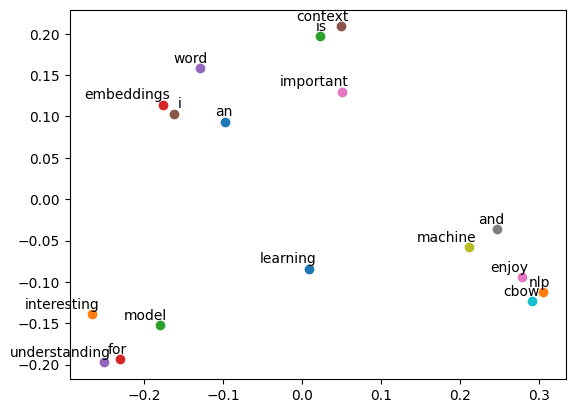

In [30]:
embeddings = model.get_weights()[0]
# The [0] selects the first element in the list, which is the embedding matrix of shape (vocab_size, embedding_size), 
# representing the word embeddings for each word in the vocabulary

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

for i,word in enumerate(tokenizer.word_index.keys()):
    x,y = reduced_embeddings[i]
    plt.scatter(x,y)
    plt.annotate(word, xy=(x,y), xytext=(5,2), textcoords = "offset points", ha="right", va="bottom")

plt.show()